# **Data in Design, AI for Urban Data and Visualization**

#### Data, Design Computation, Artificial Intelligence, Visualization, Harvard GSD


**KEYWORD:**
Vector, Raster, Urban Data, GIS, Data Processing, Data Mining, Machine Learning, Artificial Intelligence, Visualization, Mapping, Design Decision-Making

-----

#### Instructor : NJ Namju Lee / nj.namju@gmail.com  
###### * Linkedin - https://www.linkedin.com/in/nj-namju-lee-926b3252/    * Git - https://github.com/NamjuLee  

###### * Web - http://www.njstudio.co.kr                                  * Lab - http://www.njslab.com/NJSLabCore/  

###### * Video(English) - https://www.youtube.com/c/njnamjulee            * Writing(English) - https://medium.com/@nj-namju  

###### * Video(Korean) - https://www.youtube.com/c/CodeforDesign          * Writing(Korean) - https://brunch.co.kr/@njnamju  
-----

In [23]:
from sklearn import datasets
import numpy as np
import pandas as pd

### data for regression 

In [24]:
def load_boston():
    boston_raw_data = datasets.load_boston()
    # print(boston_raw_data)
    X_boston_data = pd.DataFrame(boston_raw_data.data)
    y_boston_data = pd.DataFrame(boston_raw_data.target)
    feature_boston_data = boston_raw_data.feature_names
    feature_boston_data = np.concatenate([feature_boston_data, np.array(['targets'])])
    df_boston = pd.concat([X_boston_data,y_boston_data], axis=1)
    df_boston.columns = feature_boston_data
    return df_boston
def load_diabetes():
    raw_data = datasets.load_diabetes()
    X_data = pd.DataFrame(raw_data.data)
    y_data = pd.DataFrame(raw_data.target)
    feature = raw_data.feature_names
    feature = np.concatenate([feature, np.array(['targets'])])
    df = pd.concat([X_data,y_data], axis=1)
    df.columns = feature
    return df

## data for classification

In [25]:
def load_breast_cancer():
    raw_data = datasets.load_breast_cancer()
    X_data = pd.DataFrame(raw_data.data)
    y_data = pd.DataFrame(raw_data.target)
    feature = raw_data.feature_names
    feature = np.concatenate([feature, np.array(['targets'])])
    df = pd.concat([X_data,y_data], axis=1)
    df.columns = feature
    return df
def load_iris():
    raw_data = datasets.load_iris()
    X_data = pd.DataFrame(raw_data.data)
    y_data = pd.DataFrame(raw_data.target)
    feature = raw_data.feature_names
    feature = np.concatenate([feature, np.array(['targets'])])
    df = pd.concat([X_data,y_data], axis=1)
    df.columns = feature
    return df
def load_wine():
    raw_data = datasets.load_wine()
    X_data = pd.DataFrame(raw_data.data)
    y_data = pd.DataFrame(raw_data.target)
    feature = raw_data.feature_names
    feature = np.concatenate([feature, np.array(['targets'])])
    df = pd.concat([X_data,y_data], axis=1)
    df.columns = feature
    return df

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from enum import Enum
import matplotlib.pyplot as plt

TYPE_SCALER_LIST = ('NONE','StandardScaler', 'Normalizer', 'RobustScaler', 'MinMaxScaler', 'MaxAbsScaler')
TYPE_SCALER = Enum('TYPE_SCALER', TYPE_SCALER_LIST)

def scalers(X_train, x_test, type=TYPE_SCALER.StandardScaler ):
    scaler = StandardScaler()
    if(type == TYPE_SCALER.RobustScaler):
         scaler = RobustScaler()
    elif(type == TYPE_SCALER.Normalizer):
         scaler = Normalizer()
    elif(type == TYPE_SCALER.MinMaxScaler):
         scaler = MinMaxScaler()
    elif(type == TYPE_SCALER.MaxAbsScaler):
         scaler = MaxAbsScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    x_test  = scaler.transform(x_test)
    return [X_train, x_test, scaler ]

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

def getDatasetFromDF(df, testSize=0.3):
     np.random.seed(2222)  
     array = df.to_numpy()
     np.random.shuffle(array)
     X = array[:,:-1]
     y = array[:,-1:].flatten()
     X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=testSize, random_state=2)
     return [X_train, X_test, y_train, y_test]
def getDatasetFromDFOnehot(df, testSize=0.3):
     np.random.seed(2222)  
     array = df.to_numpy()
     np.random.shuffle(array)
     X = array[:,:-1]
     y = to_categorical(array[:,-1:].flatten())
     X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=testSize, random_state=2)
     return [X_train, X_test, y_train, y_test]
def vizHistory(historyData):
     fig = plt.figure(figsize=(10, 5))
     ax0 = fig.add_subplot(1,2, 1)
     ax0.set_title('Loss')
     ax0.grid()
     ax0.set_xlabel('Epochs')
     ax0.set_ylabel('Loss')
     ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
     ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
     ax0.legend()

     try:
          if (historyData['accuracy'] != None):
               ax1 = fig.add_subplot(1,2, 2)
               ax1.set_title('Accuracy')
               ax1.grid()
               ax1.set_xlabel('Epochs')
               ax1.set_ylabel('Accuracy')
               ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
               ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
               ax1.legend()
     except :
          ax1 = fig.add_subplot(1,2, 2)
          ax1.set_title('Mean Squared Error')
          ax1.grid()
          ax1.set_xlabel('Epochs')
          ax1.set_ylabel('Mean Squared Error')
          ax1.plot(range(1,len(historyData['mean_squared_error'])+1), historyData['mean_squared_error'], c='red', label ='train Mean Squared Error' )
          ax1.plot(range(1,len(historyData['val_mean_squared_error'])+1), historyData['val_mean_squared_error'], c='green', label ='val Mean Squared Error' )
          ax1.legend()

## Regression_Model

In [27]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

TYPE_Regression_LIST = ('LinearRegression', 'Ridge', 'Lasso', 'ElasticNet')
TYPE_Regression = Enum('TYPE_Regression', TYPE_Regression_LIST)

class Regression_Model:
    def __init__(self, X_train, y_train, X_test, y_test, n = 3):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.n = n
        self.predResult = None
        self.scaler = None
    def scale(self, type=TYPE_SCALER.NONE):
        if type != TYPE_SCALER.NONE:
            X_train_scaled, X_test_scaled, scaler = scalers(self.X_train, self.X_test, type)
            self.X_train = X_train_scaled
            self.X_test = X_test_scaled
            self.scaler = scaler
    def fit(self, type=TYPE_Regression.LinearRegression):
        self.TYPE = TYPE_Regression
        self.model = LinearRegression()
        if(type == TYPE_Regression.Ridge):
            self.model = Ridge()
        elif(type == TYPE_Regression.Lasso):
            self.model = Lasso()
        elif(type == TYPE_Regression.ElasticNet):
            self.model = ElasticNet()
        self.model.fit(self.X_train, self.y_train)
        self.score()
    def predict(self, X_test):
        return self.model.predict(X_test)
    def score(self):
        self.predResult = self.model.predict(self.X_test)
        R2 = r2_score(self.y_test, self.predResult)
        MSE  = mean_squared_error(self.y_test, self.predResult)
        print(str(self.TYPE), ', R2:', R2, " ,", "MSE: ", MSE )
        return [R2, MSE]
    def coef(self):
        return self.model.coef_
    def intercept(self):
        return self.model.intercept_

In [28]:
df = load_boston()

c:\Users\namju\miniconda3\envs\tf-gpu-2022\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

In [29]:
X_train, X_test, y_train, y_test = getDatasetFromDF(df)

model = Regression_Model(X_train, y_train, X_test, y_test)
model.scale(TYPE_Regression.LinearRegression)
model.fit()
print(model.coef(), model.intercept())

<enum 'TYPE_Regression'> , R2: 0.7076049962856348  , MSE:  22.242948469869333
[-1.02948928  1.13277315  0.04789631  0.73978974 -2.45927567  2.78782208
  0.31512775 -3.43778829  3.25288152 -2.22342167 -2.36051691  1.02555048
 -3.6890774 ] 22.87881355932204


In [30]:
df = load_diabetes()
X_train, X_test, y_train, y_test = getDatasetFromDF(df)

model = Regression_Model(X_train, y_train, X_test, y_test)
model.scale(TYPE_Regression.Ridge)
model.fit()
print(model.coef(), model.intercept())

<enum 'TYPE_Regression'> , R2: 0.4882490127228074  , MSE:  3211.6934760769536
[ -3.20741266  -7.64938     26.4608481   16.05522177 -33.00882382
  18.29955666   4.94760592   8.68017214  34.43006948   0.32712675] 150.5566343042071


## Logistic_Regression_Model

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score

TYPE_Penalty_LIST = ('NONE', 'l2', 'l1', 'elasticnet')
TYPE_Penalty = Enum('TYPE_Penalty', TYPE_Penalty_LIST)

class Logistic_Regression_Model:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.predResult = None
        self.scaler = None
    def scale(self, type=TYPE_SCALER.NONE):
        if type != TYPE_SCALER.NONE:
            X_train_scaled, X_test_scaled, scaler = scalers(self.X_train, self.X_test, type)
            self.X_train = X_train_scaled
            self.X_test = X_test_scaled
            self.scaler = scaler
    def fit(self, type = TYPE_Penalty.l1):
        self.model = LogisticRegression(penalty='none')
        if(type == TYPE_Penalty.NONE):
            self.model = LogisticRegression(penalty='none')
        elif(type == TYPE_Penalty.l2):
            self.model = LogisticRegression(penalty='l2')
        elif(type == TYPE_Penalty.elasticnet):
            self.model = LogisticRegression(penalty='elasticnet')
        self.model.fit(self.X_train, self.y_train)
        self.score()
    def predict(self, X_test):
        return self.model.predict(X_test)
    def predictProba(self, X_test):
        return self.model.predict_proba(X_test)
    def score(self):
        self.predResult = self.model.predict(self.X_test)
        accuracy = precision_score(self.y_test, self.predResult)
        print(accuracy)
        return accuracy
    def confusionMatrix(self):
        return confusion_matrix(self.y_test, self.predResult)
    def classificationReport(self):
        return classification_report(self.y_test, self.predResult)
    def coef(self):
        return self.model.coef_
    def intercept(self):
        return self.model.intercept_


In [32]:
df = load_breast_cancer()
X_train, X_test, y_train, y_test = getDatasetFromDF(df)

model = Logistic_Regression_Model(X_train, y_train, X_test, y_test)
model.scale(TYPE_SCALER.StandardScaler)
model.fit(TYPE_Penalty.l1)
print(model.predictProba(model.X_test))
print(model.classificationReport())

0.9626168224299065
[[0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.06860955e-167]
 [0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 

## KNeighbors_Classifier_Model

In [33]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

class KNeighbors_Classifier_Model:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.predResult = None
        self.scaler = None
    def scale(self, type=TYPE_SCALER.NONE):
        if type != TYPE_SCALER.NONE:
            X_train_scaled, X_test_scaled, scaler = scalers(self.X_train, self.X_test, type)
            self.X_train = X_train_scaled
            self.X_test = X_test_scaled
            self.scaler = scaler
    def fit(self, nNeighbors = 2 ):
        self.model = KNeighborsClassifier(n_neighbors=nNeighbors)
        self.model.fit(self.X_train, self.y_train)
        self.score()
    def predict(self, X_test):
        return self.model.predict(X_test)
    def score(self):
        self.predResult = self.model.predict(self.X_test)
        accuracy = accuracy_score(self.y_test, self.predResult)
        print(accuracy)
        return accuracy
    def confusionMatrix(self):
        return confusion_matrix(self.y_test, self.predResult)
    def classificationReport(self):
        return classification_report(self.y_test, self.predResult)

In [34]:
df = load_wine()
X_train, X_test, y_train, y_test = getDatasetFromDF(df)

model = KNeighbors_Classifier_Model(X_train, y_train, X_test, y_test)
model.scale(TYPE_SCALER.StandardScaler)
model.fit(3)
print(model.classificationReport())

0.9259259259259259
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      0.86      0.92        28
         2.0       0.71      1.00      0.83        10

    accuracy                           0.93        54
   macro avg       0.90      0.95      0.92        54
weighted avg       0.95      0.93      0.93        54



## NaiveBayes_Classifier_Model

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

class NaiveBayes_Classifier_Model:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.predResult = None
        self.scaler = None
    def scale(self, type=TYPE_SCALER.NONE):
        if type != TYPE_SCALER.NONE:
            X_train_scaled, X_test_scaled, scaler = scalers(self.X_train, self.X_test, type)
            self.X_train = X_train_scaled
            self.X_test = X_test_scaled
            self.scaler = scaler
    def fit(self ):
        self.model = GaussianNB()
        self.model.fit(self.X_train, self.y_train)
        self.score()
    def predict(self, X_test):
        return self.model.predict(X_test)
    def score(self):
        self.predResult = self.model.predict(self.X_test)
        accuracy = recall_score(self.y_test, self.predResult, average='macro')
        print(accuracy)
        return accuracy
    def confusionMatrix(self):
        return confusion_matrix(self.y_test, self.predResult)
    def classificationReport(self):
        return classification_report(self.y_test, self.predResult)


In [36]:
df = load_wine()
X_train, X_test, y_train, y_test = getDatasetFromDF(df)

model = NaiveBayes_Classifier_Model(X_train, y_train, X_test, y_test)
model.scale(TYPE_SCALER.StandardScaler)
model.fit()
print(model.predict(model.X_test))
print(model.classificationReport())

0.9345238095238096
[0. 0. 1. 2. 1. 2. 1. 1. 0. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 2. 1. 0. 0. 0. 1. 2. 0. 1. 1. 1. 1. 0. 2. 0. 0. 1. 2. 2. 1. 2. 0.
 2. 1. 1. 1. 0. 2.]
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93        16
         1.0       0.93      0.93      0.93        28
         2.0       0.83      1.00      0.91        10

    accuracy                           0.93        54
   macro avg       0.92      0.93      0.92        54
weighted avg       0.93      0.93      0.93        54



## DecisionTree_Classifier_Model

In [37]:
from sklearn import tree 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

class DecisionTree_Classifier_Model:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.predResult = None
        self.scaler = None
    def scale(self, type=TYPE_SCALER.NONE):
        if type != TYPE_SCALER.NONE:
            X_train_scaled, X_test_scaled, scaler = scalers(self.X_train, self.X_test, type)
            self.X_train = X_train_scaled
            self.X_test = X_test_scaled
            self.scaler = scaler
    def fit(self, randomState=2 ):
        self.model = tree.DecisionTreeClassifier(random_state=randomState)
        self.model.fit(self.X_train, self.y_train)
        self.score()
    def predict(self, X_test):
        return self.model.predict(X_test)
    def score(self):
        self.predResult = self.model.predict(self.X_test)
        accuracy = f1_score(self.y_test, self.predResult, average='macro')
        print(accuracy)
        return accuracy
    def confusionMatrix(self):
        return confusion_matrix(self.y_test, self.predResult)
    def classificationReport(self):
        return classification_report(self.y_test, self.predResult)

In [38]:
df = load_wine()
X_train, X_test, y_train, y_test = getDatasetFromDF(df, 0.2)

model = DecisionTree_Classifier_Model(X_train, y_train, X_test, y_test)
model.scale(TYPE_SCALER.StandardScaler)
model.fit()
print(model.predict(model.X_test))
print(model.classificationReport())

0.9312169312169312
[0. 0. 1. 1. 1. 2. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 2. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 2. 1. 0. 0. 0. 1. 2. 0. 1. 1.]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        10
         1.0       0.95      0.95      0.95        21
         2.0       1.00      0.80      0.89         5

    accuracy                           0.94        36
   macro avg       0.95      0.92      0.93        36
weighted avg       0.95      0.94      0.94        36



## RandomForest_Classifier_Model

In [39]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

class RandomForest_Classifier_Model:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.predResult = None
        self.scaler = None
    def scale(self, type=TYPE_SCALER.NONE):
        if type != TYPE_SCALER.NONE:
            X_train_scaled, X_test_scaled, scaler = scalers(self.X_train, self.X_test, type)
            self.X_train = X_train_scaled
            self.X_test = X_test_scaled
            self.scaler = scaler
    def fit(self, maxDepth=3, randomState = 2 ):
        self.model = tree.DecisionTreeClassifier(max_depth=maxDepth, random_state=randomState)
        self.model.fit(self.X_train, self.y_train)
        self.score()
    def predict(self, X_test):
        return self.model.predict(X_test)
    def score(self):
        self.predResult = self.model.predict(self.X_test)
        accuracy = accuracy_score(self.y_test, self.predResult)
        print(accuracy)
        return accuracy
    def confusionMatrix(self):
        return confusion_matrix(self.y_test, self.predResult)
    def classificationReport(self):
        return classification_report(self.y_test, self.predResult)

In [40]:
df = load_wine()
X_train, X_test, y_train, y_test = getDatasetFromDF(df, 0.2)

model = RandomForest_Classifier_Model(X_train, y_train, X_test, y_test)
model.scale(TYPE_SCALER.StandardScaler)
model.fit(maxDepth=3)
print(model.confusionMatrix())

0.9166666666666666
[[ 9  1  0]
 [ 1 20  0]
 [ 0  1  4]]


## SVM_Classifier_Model

In [41]:
from sklearn import svm

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

TYPE_SVM_KERNEL_LIST = ('linear', 'poly', 'rbf', 'sigmoid', 'precomputed')
TYPE_SVM_KERNEL = Enum('TYPE_SVM_KERNEL', TYPE_SVM_KERNEL_LIST)

class SVM_Classifier_Model:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.predResult = None
        self.scaler = None
    def scale(self, type=TYPE_SCALER.NONE):
        if type != TYPE_SCALER.NONE:
            X_train_scaled, X_test_scaled, scaler = scalers(self.X_train, self.X_test, type)
            self.X_train = X_train_scaled
            self.X_test = X_test_scaled
            self.scaler = scaler
    def fit(self, kernel=TYPE_SVM_KERNEL.rbf, randomState = 2 ):
        self.model = svm.SVC(kernel='rbf', random_state=randomState)
        if(type == TYPE_SVM_KERNEL.linear):
            self.model = svm.SVC(kernel='linear', random_state=randomState)
        elif(type == TYPE_SVM_KERNEL.poly):
            self.model = svm.SVC(kernel='poly', random_state=randomState)
        elif(type == TYPE_SVM_KERNEL.sigmoid):
            self.model = svm.SVC(kernel='sigmoid', random_state=randomState)
        elif(type == TYPE_SVM_KERNEL.precomputed):
            self.model = svm.SVC(kernel='precomputed', random_state=randomState)
        self.model.fit(self.X_train, self.y_train)
        self.score()
    def predict(self, X_test):
        return self.model.predict(X_test)
    def score(self):
        self.predResult = self.model.predict(self.X_test)
        accuracy = accuracy_score(self.y_test, self.predResult)
        print(accuracy)
        return accuracy
    def confusionMatrix(self):
        return confusion_matrix(self.y_test, self.predResult)
    def classificationReport(self):
        return classification_report(self.y_test, self.predResult)

In [42]:
df = load_wine()
X_train, X_test, y_train, y_test = getDatasetFromDF(df, 0.2)

model = SVM_Classifier_Model(X_train, y_train, X_test, y_test)
model.scale(TYPE_SCALER.StandardScaler)
model.fit(TYPE_SVM_KERNEL.sigmoid, randomState=3)
print(model.confusionMatrix())

0.9722222222222222
[[ 9  1  0]
 [ 0 21  0]
 [ 0  0  5]]


## Network_Regression

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

class Network_Regression:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.scaler = None

        self.model = Sequential()
        # input layer
        self.model.add(Dense(64, input_dim=self.X_train.shape[1], activation="relu"))
        # self.model.add(Dropout(0.25))
        self.model.add(BatchNormalization())

        self.model.add(Dense(32, activation='relu'))
        # self.model.add(Dropout(0.5))
        # self.model.add(BatchNormalization())

        # output layer
        self.model.add(Dense(1))
        self.model.compile(
            loss='mean_squared_error', 
            optimizer='adam', 
            metrics=['mean_squared_error']
        )
        print(self.model.summary())
    def scale(self, type=TYPE_SCALER.NONE):
        if type != TYPE_SCALER.NONE:
            X_train_scaled, X_test_scaled, scaler = scalers(self.X_train, self.X_test, type)
            self.X_train = X_train_scaled
            self.X_test = X_test_scaled
            self.scaler = scaler
    def fit(self, epochs = 50):
        self.hist = self.model.fit(
            self.X_train, self.y_train, 
            validation_data=(self.X_test, self.y_test),
            epochs=epochs, 
            batch_size=10,
            verbose=1
            )
        self.score()
    def score(self):
        print('train data: ', self.model.evaluate(self.X_train, self.y_train)[1])
        print('test data: ', self.model.evaluate(self.X_test, self.y_test)[1])
    def predict(self, X_test):
        return self.model.predict(X_test)
    def history(self):
        vizHistory(self.hist.history)



In [44]:
df = load_boston()

c:\Users\namju\miniconda3\envs\tf-gpu-2022\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

In [45]:

X_train, X_test, y_train, y_test = getDatasetFromDF(df, 0.3)

model = Network_Regression(X_train, y_train, X_test, y_test)
model.fit(epochs=20)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 3,265
Trainable params: 3,137
Non-trainable params: 128
_________________________________________________________________
None
Epoch 1/20
36/36 [==============================] - 4s 15ms/step - loss: 606.9117 - mean_squared_error: 606.9117 - val_loss: 401.3420 - val_mean_squared_error: 401.3420
Epoch 2/20
36/36 [==============================] - 0s 9ms/step - loss: 494.

12/12 [==============================] - 0s 3ms/step - loss: 27.6469 - mean_squared_error: 27.6469
train data:  27.64688491821289
5/5 [==============================] - 0s 2ms/step - loss: 21.8609 - mean_squared_error: 21.8609
test data:  21.860919952392578


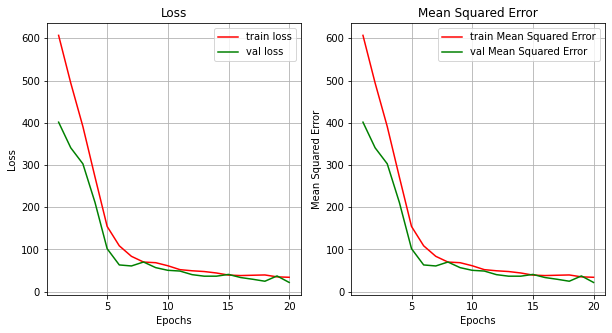

In [46]:
model.score()
model.history()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                704       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 3,073
Trainable params: 2,945
Non-trainable params: 128
_________________________________________________________________
None
Epoch 1/50
36/36 [==============================] - 1s 14ms/step - loss: 29188.6660 - mean_squared_error: 29188.6660 - val_loss: 26956.8516 - val_mean_squared_error: 26956.8516
Epoch 2/50
36/36 [==============================] - 0s 7ms/step - 

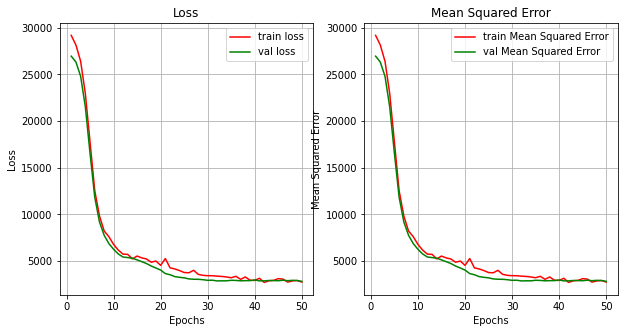

In [47]:
df = load_diabetes()

X_train, X_test, y_train, y_test = getDatasetFromDF(df, 0.2)

model = Network_Regression(X_train, y_train, X_test, y_test)
model.scale(TYPE_SCALER.StandardScaler)
model.fit(epochs=50)
model.history()
model.score()

## Network_Classification

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

class Network_Classification:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.scaler = None

        self.model = Sequential()
        # input layer
        self.model.add(Dense(64, input_dim = self.X_train.shape[1], activation="relu"))
        # self.model.add(Dropout(0.25))
        self.model.add(BatchNormalization())

        self.model.add(Dense(32, activation='relu'))
        # self.model.add(Dropout(0.5))
        # self.model.add(BatchNormalization())

        # output layer
        self.model.add(Dense(self.y_train.shape[1], activation='softmax'))
        self.model.compile(
            loss='categorical_crossentropy', 
            optimizer='adam', 
            metrics=['accuracy']
        )
        print(self.model.summary())

    def scale(self, type=TYPE_SCALER.NONE):
        if type != TYPE_SCALER.NONE:
            X_train_scaled, X_test_scaled, scaler = scalers(self.X_train, self.X_test, type)
            self.X_train = X_train_scaled
            self.X_test = X_test_scaled
            self.scaler = scaler
    def fit(self, epochs = 50):
        self.hist = self.model.fit(
            self.X_train, self.y_train, 
            validation_data=(self.X_test, self.y_test),
            epochs=epochs, 
            batch_size=10,
            verbose=1
            )
        self.score()
    def score(self):
        print('train data: ', self.model.evaluate(self.X_train, self.y_train)[1])
        print('test data: ', self.model.evaluate(self.X_test, self.y_test)[1])
    def predict(self, X_test):
        return self.model.predict(X_test)
    def history(self):
        vizHistory(self.hist.history)



In [49]:
df = load_wine()
X_train, X_test, y_train, y_test = getDatasetFromDFOnehot(df, 0.2)

model = Network_Classification(X_train, y_train, X_test, y_test)
model.scale(TYPE_SCALER.StandardScaler)
model.fit(epochs=10)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 99        
Total params: 3,331
Trainable params: 3,203
Non-trainable params: 128
_________________________________________________________________
None
Epoch 1/10
15/15 [==============================] - 3s 60ms/step - loss: 0.9692 - accuracy: 0.5493 - val_loss: 0.8225 - val_accuracy: 0.6389
Epoch 2/10
15/15 [==============================] - 0s 21ms/step - loss: 0.5261 - accuracy: 0.8239 - v

In [50]:
model.score()

5/5 [==============================] - 0s 6ms/step - loss: 0.1456 - accuracy: 0.9930
train data:  0.9929577708244324
2/2 [==============================] - 0s 4ms/step - loss: 0.1617 - accuracy: 0.9722
test data:  0.9722222089767456


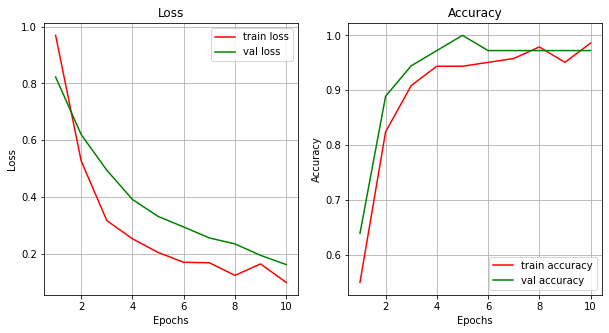

In [51]:
model.history()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                320       
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 99        
Total params: 2,755
Trainable params: 2,627
Non-trainable params: 128
_________________________________________________________________
None
Epoch 1/100
12/12 [==============================] - 2s 70ms/step - loss: 0.7559 - accuracy: 0.6583 - val_loss: 0.9453 - val_accuracy: 0.5333
Epoch 2/100
12/12 [==============================] - 0s 22ms/step - loss: 0.4490 - accuracy: 0.8833 -

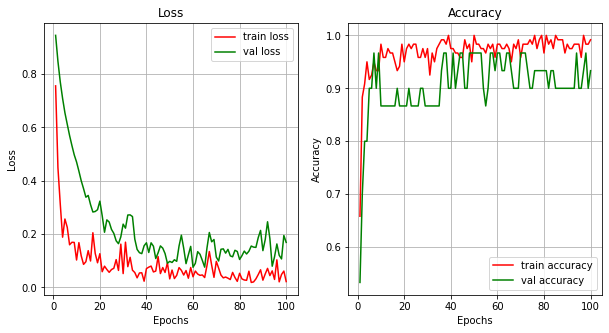

In [52]:
df = load_iris()

X_train, X_test, y_train, y_test = getDatasetFromDFOnehot(df, 0.2)

model = Network_Classification(X_train, y_train, X_test, y_test)
model.scale(TYPE_SCALER.StandardScaler)
model.fit(epochs=100)
model.history()
model.score()